In [9]:
def load_result_nodes(filename):
    nodes=[]
    with open(filename,"r") as f:
        nodes=f.readlines()
    return nodes
def load_oringin(filename):
    nodes=set()
    edges=[]
    with open(filename,"r") as f:
        edges=f.readlines()
    for edge in edges:
        edge=edge.strip().split(" ")
        nodes.add(edge[0])
        nodes.add(edge[1])
    return len(nodes),len(edges)

In [16]:
import pandas as pd 
distance4_result_file=""

distance3_result_file="../graph_file/distance_3_result/"
distance3_oringin_file="../graph_file/distance_3/"
distance4_result_file="../graph_file/distance_4_result/"
distance4_oringin_file="../graph_file/distance_4/"
import os
dataframe=pd.DataFrame(columns=["个体编号","原始节点数","原始边数","结果点数"])
for file in os.listdir(distance4_result_file):
    row={}
    # print(file[:6]) 
    oring_nodes_len,oringin_edges_len=load_oringin(distance4_oringin_file+file)
    result_nodes=load_result_nodes(distance4_result_file+file)
    person_name=file[:6]
    row["个体编号"]=person_name
    row["原始节点数"]=oring_nodes_len
    row["原始边数"]=oringin_edges_len
    row["结果点数"]=len(result_nodes)
    dataframe=pd.concat([dataframe,pd.DataFrame([row])])

    # print(f"个体{person_name}的原始节点数为{oring_nodes_len},原始边数为{oringin_edges_len},结果节点数为{len(result_nodes)}")
print(dataframe)
dataframe.to_csv("../graph_file/result_distance_4.csv",index=False)

      个体编号 原始节点数   原始边数  结果点数
0   114621  5599  88495  5071
0   114823  6135  92751  5639
0   115017  5811  90449  5164
0   115219  6095  88140  5440
0   115320  5105  87848  4661
..     ...   ...    ...   ...
0   139839  6395  87879  5530
0   140117  5298  86481  4795
0   140319  5345  87354  4887
0   140420  5423  85921  5091
0   140824  6073  89040  5598

[100 rows x 4 columns]


In [ ]:
import networkx as nx
g=nx.read_edgelist("../graph_file/distance_4/114823.txt",nodetype=str)
g1=nx.read_edgelist("../graph_file/distance_3/114823.txt",nodetype=str)

In [45]:
print(nx.degree_histogram(g))

[0, 0, 225, 144, 196, 206, 186, 189, 161, 196, 181, 167, 161, 157, 157, 148, 138, 109, 120, 121, 113, 107, 101, 92, 85, 104, 81, 91, 77, 65, 81, 61, 74, 61, 70, 68, 73, 54, 53, 66, 58, 50, 51, 47, 47, 55, 42, 39, 41, 35, 24, 44, 32, 38, 42, 35, 31, 25, 31, 34, 26, 31, 25, 17, 23, 22, 25, 18, 23, 18, 21, 22, 26, 10, 19, 26, 14, 22, 19, 15, 13, 19, 12, 10, 12, 11, 13, 10, 17, 8, 7, 11, 10, 10, 7, 11, 10, 6, 9, 5, 8, 5, 2, 5, 6, 4, 4, 4, 2, 5, 3, 4, 7, 2, 2, 0, 1, 1, 3, 2, 0, 5, 2, 5, 1, 0, 3, 0, 5, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [46]:

import matplotlib.pyplot as plt
degrees=[]
for it,de in g.degree:
    degrees.append(de)


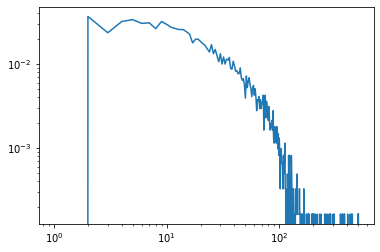

In [47]:
#度分布图，距离4为例
degree_distribute=nx.degree_histogram(g)
x=range(len(degree_distribute))
y=[z/float(sum(degree_distribute))for z in degree_distribute]
plt.loglog(x,y)
plt.show()

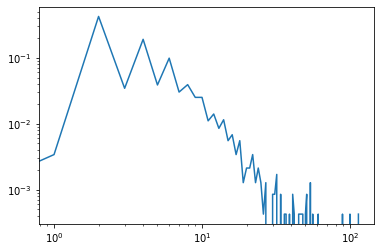

In [48]:
#度分布图，距离3为例
degree_distribute=nx.degree_histogram(g1)
x=range(len(degree_distribute))
y=[z/float(sum(degree_distribute))for z in degree_distribute]
plt.loglog(x,y)
plt.show()

In [ ]:
#聚集系数
g_average_clustering_num=nx.average_clustering(g)
g_average_clustering_num1=nx.average_clustering(g1)
print("平均聚集系数："+str(g_average_clustering_num),g_average_clustering_num1)

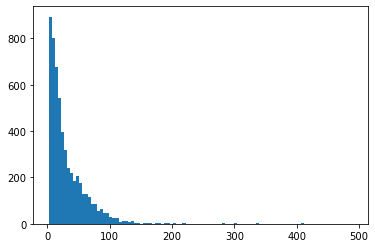

In [25]:
plt.hist(degrees,bins=100)
plt.show()

In [55]:
print(nx.average_shortest_path_length(g))

3.4024619945371093


In [ ]:
counts=[de for de in degrees if de>200]


In [40]:
df1=pd.read_csv("../graph_file/result_distance_3.csv")
df2=pd.read_csv("../graph_file/result_distance_4.csv")
df1.columns=["个体编号","4_3原始节点数","4_3原始边数","FIDNER结果点数"]
# df1.reindex(columns=["个体编号","4_3原始节点数","4_3原始边数","FIDNER结果点数"])
df2.columns=["个体编号","4_4原始节点数","4_4原始边数","FIDNER结果点数"]
# df2.reindex(columns=["个体编号","4_4原始节点数","4_4原始边数","FIDNER结果点数"])
df2

,个体编号,4_4原始节点数,4_4原始边数,FIDNER结果点数
0,114621,5599,88495,5071
1,114823,6135,92751,5639
2,115017,5811,90449,5164
3,115219,6095,88140,5440
4,115320,5105,87848,4661
...,...,...,...,...
95,139839,6395,87879,5530
96,140117,5298,86481,4795
97,140319,5345,87354,4887
98,140420,5423,85921,5091


In [ ]:
import pandas


In [41]:
pd.merge(df1,df2,on="个体编号").to_csv("../graph_file/result_distance_3_4.csv",index=False)
df1

,个体编号,4_3原始节点数,4_3原始边数,FIDNER结果点数
0,114823,2360,6330,1115
1,115017,2600,7702,1242
2,115219,2102,5300,1003
3,115320,3449,15673,1803
4,115825,2548,7456,1227
...,...,...,...,...
94,139839,1731,3818,823
95,140117,3112,12024,1527
96,140319,2995,9729,1480
97,140420,3156,10346,1595


In [ ]:
#计算结果中的前两百个点的分布